In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram


In a circuit, tipically need to do three jobs:
  - Encode the input.
  - Do some actual computation.
  - Extract an output.

In [5]:
## Circuit with eight qubits and eight outputs
n = 8
nQ = n ## Number of qubits in the circuit.
nB = n ## Number of output bits we will extract from the circuit at the end.
qcOutput = QuantumCircuit(nQ, nB)

# Measure
The extraction of outputs in a quantum circuit is don using an operation called **measure**.
Each measurement tells a specific qubit to give an output to a specific output bit.

The command qc.measure(j, j) adds a measurement to our circuit qc that tells qubit j to write an output to bit j.

In [6]:
for j in range(n):
  qcOutput.measure(j, j)

In [7]:
qcOutput.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

Qubits are always initialized to give the output 0. Since we don't do anything with the qubits in the above circuit, this is exactly the result we get when we measure them.

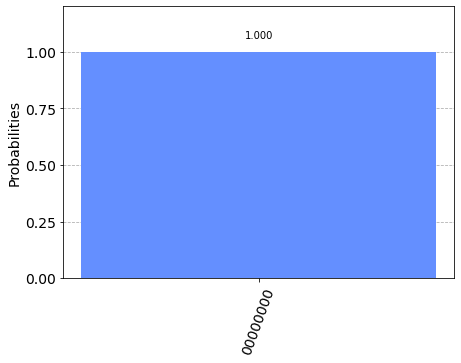

In [8]:
counts = execute(qcOutput, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results.

Simulations are only possible for small numbers of qubits (~30 qubits).

To run on a real device you simply need to replace **Aer.get_backend('qasm_simulator')** with the backend object of the device you want to use.

# Creating an adder circuit

## The NOT gate
In Quantum computers the equivalent to this operation is the **X operation**

In [9]:
qcEncode = QuantumCircuit(n)
qcEncode.x(7)

qcEncode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

Extracting results can be done using the circuit from before (qcOutput).

Adding the two circuits using qcEncode + qcOutput creates a new circuit with everything needed to extract an output added at the end.

In [13]:
qc = qcEncode + qcOutput

qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

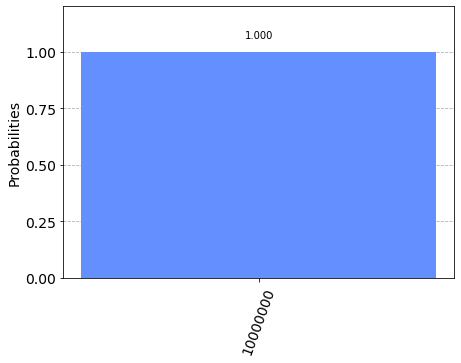

In [14]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Qiskit numbers the bits in a string from right to left

### My age = 20

In [15]:
qcEncode = QuantumCircuit(n)
qcEncode.x(2)
qcEncode.x(4)

qc = qcEncode + qcOutput

qc.draw()

┌─┐                  
q_0: ─────┤M├──────────────────
          └╥┘┌─┐               
q_1: ──────╫─┤M├───────────────
     ┌───┐ ║ └╥┘         ┌─┐   
q_2: ┤ X ├─╫──╫──────────┤M├───
     └───┘ ║  ║ ┌─┐      └╥┘   
q_3: ──────╫──╫─┤M├───────╫────
     ┌───┐ ║  ║ └╥┘       ║ ┌─┐
q_4: ┤ X ├─╫──╫──╫────────╫─┤M├
     └┬─┬┘ ║  ║  ║        ║ └╥┘
q_5: ─┤M├──╫──╫──╫────────╫──╫─
      └╥┘  ║  ║  ║ ┌─┐    ║  ║ 
q_6: ──╫───╫──╫──╫─┤M├────╫──╫─
       ║   ║  ║  ║ └╥┘┌─┐ ║  ║ 
q_7: ──╫───╫──╫──╫──╫─┤M├─╫──╫─
       ║   ║  ║  ║  ║ └╥┘ ║  ║ 
c: 8/══╩═══╩══╩══╩══╩══╩══╩══╩═
       5   0  1  3  6  7  2  4

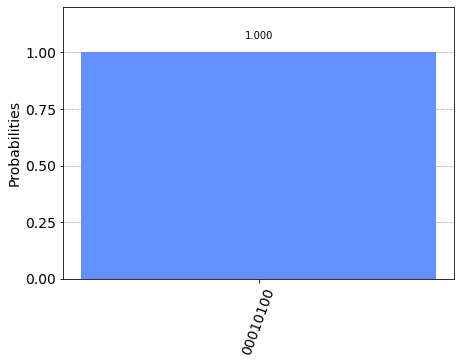

In [16]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# Adding with Qiskit | Half adder

- (0 + 0 = 00)
- (0 + 1 = 01)
- (1 + 0 = 01)
- (1 + 1 = 10)

In [18]:
"""
The XOR gate is done by the controlled-NOT gate.

The controlled-NOT gate is usually called CNOT.
"""

qcCnot = QuantumCircuit(2)
qcCnot.cx(0, 1)
qcCnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [19]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

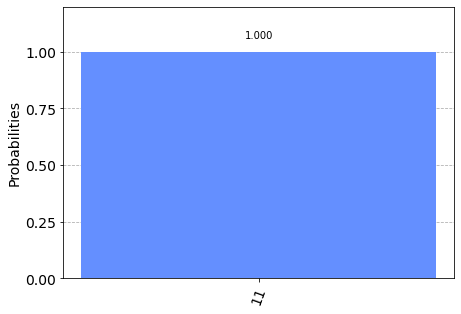

In [20]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Implementing half adder

In [22]:
qcHa = QuantumCircuit(4, 2)

# encode inputs in qubits 0 and 1
qcHa.x(0) # For a = 0, remove this line. For a = 1, leave it.
qcHa.x(1)
qcHa.barrier()

# use CNOT's to write the XOR of the inputs on qubit 2
qcHa.cx(0, 2)
qcHa.cx(1, 2)
qcHa.barrier()

# use Toffoli gate, it's an AND
qcHa.ccx(0, 1, 3)
qcHa.barrier()

# extract outputs, the XOR value
qcHa.measure(2, 0)
qcHa.measure(3, 1)
qcHa.draw()

┌───┐ ░            ░       ░       
q_0: ┤ X ├─░───■────────░───■───░───────
     ├───┤ ░   │        ░   │   ░       
q_1: ┤ X ├─░───┼────■───░───■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

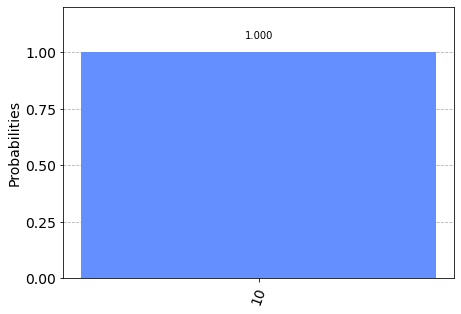

In [23]:
counts = execute(qcHa,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [24]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}